In [81]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.shape

(4269, 13)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
df[' education'].value_counts()

 education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [8]:
df[' self_employed'].value_counts()

 self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64

In [9]:
df[' cibil_score']

0       778
1       417
2       506
3       467
4       382
       ... 
4264    317
4265    559
4266    457
4267    780
4268    607
Name:  cibil_score, Length: 4269, dtype: int64

In [10]:
# Renaming columns 
df.columns = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']

In [11]:
df['cibil_score'].max() , df['cibil_score'].min()

(900, 300)

In [12]:
b = df[(df['cibil_score'] >=800)]
b.shape

(695, 13)

In [13]:
b['loan_status'].value_counts()

loan_status
 Approved    692
 Rejected      3
Name: count, dtype: int64

In [14]:
df['self_employed'].value_counts()

self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64

In [15]:
self_emp = df[df['self_employed'] == " Yes"]
self_emp

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,4259,5,Graduate,Yes,9700000,22600000,16,346,23500000,12900000,26800000,13000000,Rejected
4259,4260,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected


In [16]:
business_man = df[df['self_employed'] == " No"]
business_man

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,4263,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [17]:
self_emp['loan_status'].value_counts()

loan_status
 Approved    1338
 Rejected     812
Name: count, dtype: int64

In [18]:
business_man['loan_status'].value_counts()

loan_status
 Approved    1318
 Rejected     801
Name: count, dtype: int64

In [19]:
df['education'].value_counts()

education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [20]:
graduate = df[df['education']== ' Graduate']

In [21]:
non_graduate = df[df['education']== ' Not Graduate']

In [22]:
graduate

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved
4262,4263,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected


In [23]:
non_graduate

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected
11,12,2,Not Graduate,Yes,6700000,22700000,18,538,15300000,5800000,20400000,6400000,Rejected
12,13,3,Not Graduate,Yes,5000000,11600000,16,311,6400000,9600000,14600000,4300000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,4255,0,Not Graduate,Yes,8900000,27700000,6,372,18200000,14900000,33700000,6100000,Rejected
4259,4260,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected


In [24]:
graduate['loan_status'].value_counts()

loan_status
 Approved    1339
 Rejected     805
Name: count, dtype: int64

In [25]:
non_graduate['loan_status'].value_counts()

loan_status
 Approved    1317
 Rejected     808
Name: count, dtype: int64

In [26]:
df[df['income_annum'] >= df['income_annum'].mean()]['loan_status'].value_counts()

loan_status
 Approved    1325
 Rejected     820
Name: count, dtype: int64

In [27]:
df['loan_status'].value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [28]:
df['education'] = df['education'].map(lambda x:x[1:])
df['loan_status'] = df["loan_status"].map(lambda x:x[1:])
df['self_employed'] = df['self_employed'].map(lambda x:x[1:])

In [29]:
df['education'].value_counts().keys()

Index(['Graduate', 'Not Graduate'], dtype='object', name='education')

In [30]:
df['loan_status'].value_counts().keys()

Index(['Approved', 'Rejected'], dtype='object', name='loan_status')

In [31]:
df['self_employed'].value_counts().keys()

Index(['Yes', 'No'], dtype='object', name='self_employed')

In [32]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [33]:
df['education'] = df['education'].map({'Graduate':1, 'Not Graduate':0})

In [34]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [35]:
df['self_employed'] = df['self_employed'].map({'Yes':1, 'No':0})

In [36]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [37]:
df['loan_status'] = df['loan_status'].map({'Approved':1,'Rejected':0})

In [38]:
df['loan_status'].value_counts(normalize=True)*100

loan_status
1    62.215976
0    37.784024
Name: proportion, dtype: float64

In [39]:
x = df.drop('loan_status',  axis=1)

In [40]:
x

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [41]:
y = df[['loan_status']]

In [42]:
y

,loan_status
0,1
1,0
2,0
3,0
4,0
...,...
4264,0
4265,1
4266,0
4267,1


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [45]:
x_train

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
3913,3914,5,1,0,9400000,36800000,10,509,20700000,7400000,22400000,6300000
4117,4118,1,1,1,3500000,13100000,10,477,3200000,6200000,7500000,3100000
3939,3940,5,1,0,4200000,12500000,18,723,1200000,300000,12900000,6100000
2889,2890,0,0,1,1800000,6500000,12,728,3500000,0,6100000,1900000
3613,3614,5,1,1,1400000,2700000,16,320,900000,2500000,2700000,2000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3125,3126,0,1,1,3300000,9700000,14,356,9800000,4800000,9400000,1900000
533,534,2,1,1,1700000,4300000,6,765,5000000,1500000,3400000,900000
2322,2323,5,0,1,200000,300000,10,704,500000,100000,800000,200000
2025,2026,0,1,0,9800000,34800000,14,497,3000000,2200000,23800000,9600000


In [46]:
x_test

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
4055,4056,0,1,0,4900000,16300000,14,479,1600000,6400000,18600000,2700000
3760,3761,1,0,0,1600000,5600000,6,846,600000,2800000,4600000,1200000
3867,3868,5,0,1,2900000,11100000,4,683,1700000,3900000,9400000,3300000
2562,2563,0,0,1,3700000,13100000,14,385,10600000,6800000,9200000,4900000
3365,3366,3,0,1,7800000,24400000,20,490,6700000,5100000,17700000,4100000
...,...,...,...,...,...,...,...,...,...,...,...,...
609,610,4,0,0,8300000,17900000,20,846,12700000,1300000,26800000,12200000
193,194,2,1,0,4800000,13200000,2,583,13700000,5800000,9500000,5200000
1219,1220,0,0,1,8600000,17700000,20,711,22000000,0,30800000,7400000
4120,4121,3,1,0,9100000,19900000,2,711,2200000,17900000,24300000,13000000


In [47]:
y_train

,loan_status
3913,0
4117,0
3939,1
2889,1
3613,0
...,...
3125,0
533,1
2322,1
2025,0


In [48]:
y_test

,loan_status
4055,0
3760,1
3867,1
2562,0
3365,0
...,...
609,1
193,1
1219,1
4120,1


# Arificial Neural Network

Before training a ANN with our data , we need to normalize our x variables

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
std_scaler = StandardScaler()

In [51]:
x_train_transforemed = std_scaler.fit_transform(x_train)


In [52]:
x_test_transformed = std_scaler.fit_transform(x_test)

In [53]:
x_train_transforemed

array([[ 1.43231803,  1.47210319,  0.98690853, ...,  0.53518267,
         0.79621776,  0.39496489],
       [ 1.59819259, -0.88174552,  0.98690853, ...,  0.26309303,
        -0.8408512 , -0.58185499],
       [ 1.45345891,  1.47210319,  0.98690853, ..., -1.07468107,
        -0.24755104,  0.33391365],
       ...,
       [ 0.13865905,  1.47210319, -1.01326513, ..., -1.12002934,
        -1.57698287, -1.46709802],
       [-0.1028348 , -1.4702077 ,  0.98690853, ..., -0.64387246,
         0.95003631,  1.4023104 ],
       [ 0.01018757, -0.88174552, -1.01326513, ..., -1.12002934,
        -0.24755104, -0.21554754]])

In [54]:
x_test_transformed

array([[ 1.60569132, -1.48711753,  1.03092285, ...,  0.39463923,
         0.3932427 , -0.68750127],
       [ 1.36776488, -0.89227052, -0.97000469, ..., -0.44459356,
        -1.14418569, -1.16515021],
       [ 1.45406362,  1.48711753, -0.97000469, ..., -0.18816132,
        -0.61706738, -0.49644169],
       ...,
       [-0.6816286 , -1.48711753, -0.97000469, ..., -1.09733018,
         1.73300173,  0.80913209],
       [ 1.65811579,  0.29742351,  1.03092285, ...,  3.07552176,
         1.01919569,  2.59235482],
       [ 1.63956559,  0.29742351,  1.03092285, ..., -0.53784165,
        -0.93553469, -0.71934453]])

In [55]:
x_train_transforemed.shape  

(3415, 12)

This tells that there are 12 input x variables. Thus there will be 12 neurons in the Input Layer. Therefore, the no. of neurons in the input layer must be equal to no. of input x variables


In case of binary classification, we can take either one or 2 neurons in the output layer

In [56]:
no_of_neuron_at_input_layer = x.shape[1]
no_of_neuron_at_input_layer

12

In [57]:
output_layer_neuron = 1

In [58]:
from tensorflow.keras.layers import Dense  # used to form layer in our Neural Network
from tensorflow.keras.models import Sequential # used to arrange our layers in sequence

# ANN Model Structure ==>   input layer ------> hidden layer ------> output

All the layers if the ANN Model are in a sequence  
The output of one layer is the input of its following layer

In [59]:
ann_model = Sequential()

relu function ===> max(0,z)    
if value of z is greater than 0, return z else return 0

In [60]:
# This is hidden layer
# Dense function is used for making layers

ann_model.add(Dense(units=68,activation='relu', input_dim = 12))  #units are the number of neurons, input_dim is no. of input layer

# Adding More hidden layers, Due to input_dim, we have also added our input layer
ann_model.add(Dense(units=32,activation='relu'))
ann_model.add(Dense(units=24,activation='relu'))

ann_model.add(Dense(units=1,activation='sigmoid')) # output layer

# This is for the back propagation

# for multi class problem statement, use 'categorical_crossentropy' loss function or 'sparse_categorical_crossentropy' loss function

# to change the value of weights during back propagration, optimizers are used. We are using 'adam' optimizer

ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ann_model.summary()

c:\Users\Arham\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 68)             │           884 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,909 (15.27 KB)

 Trainable params: 3,909 (15.27 KB)

 Non-trainable params: 0 (0.00 B)

There is no limitation on number of neurons in the hidden layers. On increasing the number of nuerons in the hidden layer, the processing power of the hidden layer increases. But on highly increasing the no. of neurons, the model can be overfit. In that case, the accuracy of the training data is good but the accuracy of the testing data reduces

 . On output layer, for binary classification, we will use 'sigmoid' activation function      
 . On output layer, for classification with more than 2 classes, we will use 'softmax' activation function    
 . 'relu' activation function is mostly used in hidden layer

ANN Architecture always works on normalized data

# Training or ANN Model -->

without normalizing data, the accuracy is low

In [61]:
history = ann_model.fit(x_train,y_train, epochs=5)  #  epochs means the number of times we will train our model

Epoch 1/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.5364 - loss: 237044.2656  
Epoch 2/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.5635 - loss: 24002.2090
Epoch 3/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.5258 - loss: 17085.0625
Epoch 4/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.5447 - loss: 15921.1455
Epoch 5/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.5436 - loss: 10193.2686


with normalized data, the accuracy is high

In [62]:
history = ann_model.fit(x_train_transforemed,y_train, epochs=5)

Epoch 1/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.7695 - loss: 0.4917
Epoch 2/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.9165 - loss: 0.2282
Epoch 3/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.9327 - loss: 0.1910
Epoch 4/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.9400 - loss: 0.1783
Epoch 5/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9471 - loss: 0.1432


In [63]:
# history = ann_model.fit(x_train_transforemed,y_train, epochs=10) # training our model 10 times to increase accuracy

In [64]:
history = ann_model.fit(x_train_transforemed,y_train, epochs=10, validation_data=(x_test_transformed, y_test))  # this will show accuracy and loss of training as well as testing data

Epoch 1/10


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9388 - loss: 0.1580 - val_accuracy: 0.9356 - val_loss: 0.1787
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.9443 - loss: 0.1508 - val_accuracy: 0.9379 - val_loss: 0.1739
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9482 - loss: 0.1442 - val_accuracy: 0.9333 - val_loss: 0.1762
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9464 - loss: 0.1514 - val_accuracy: 0.9450 - val_loss: 0.1651
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.9420 - loss: 0.1519 - val_accuracy: 0.9473 - val_loss: 0.1648
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9485 - loss: 0.1269 - val_accuracy: 0.9426 - val_loss: 0.1661
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9485 - loss: 0.1313 - val_accuracy: 0.9356 - val_loss: 0.1710
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.9565 - loss: 0.1247 - val_accuracy: 0.9379 

In [65]:
history = ann_model.fit(x_train_transforemed,y_train, epochs=20,initial_epoch=10,validation_data=(x_test_transformed, y_test))  # trainig aour model after trainingnit 10 times

Epoch 11/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9524 - loss: 0.1115 - val_accuracy: 0.9438 - val_loss: 0.1645
Epoch 12/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.9561 - loss: 0.1281 - val_accuracy: 0.9461 - val_loss: 0.1557
Epoch 13/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.9528 - loss: 0.1201 - val_accuracy: 0.9485 - val_loss: 0.1554
Epoch 14/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.9562 - loss: 0.1156 - val_accuracy: 0.9485 - val_loss: 0.1523
Epoch 15/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.9624 - loss: 0.1017 - val_accuracy: 0.9508 - val_loss: 0.1514
Epoch 16/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.9678 - loss: 0.0895 - val_accuracy: 0.9461 - val_loss: 0.1534
Epoch 17/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.9612 - loss: 0.1079 - val_accuracy: 0.9532 - val_loss: 0.1424
Epoch 18/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9641 - loss: 0.102

# Analysing our model


We are seeing what all is stored in our history variable

In [66]:
training_detail = pd.DataFrame(history.history)

In [67]:
training_detail

,accuracy,loss,val_accuracy,val_loss
0,0.954319,0.117278,0.943794,0.164484
1,0.954319,0.116165,0.946136,0.155693
2,0.958419,0.112680,0.948478,0.155420
3,0.959883,0.109978,0.948478,0.152269
4,0.961933,0.106038,0.950820,0.151353
5,0.960469,0.104405,0.946136,0.153436
6,0.961054,0.102184,0.953162,0.142387
7,0.965154,0.098585,0.948478,0.151055
8,0.968082,0.095220,0.949649,0.147207
9,0.966618,0.094516,0.949649,0.141036


<Axes: >

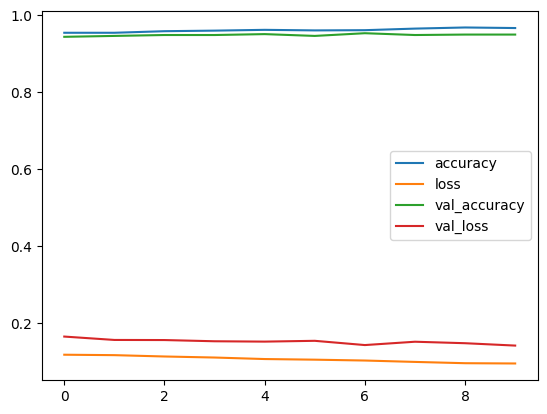

In [68]:
training_detail.plot()   # plotting graph using pandas

# Saving our model  
We can save our model without using joblib


In [69]:
ann_model.save('loan_approval.h5')  # h5 is extension for tensorflow model

# Taking Prediction from our model

In [70]:
pred = ann_model.predict(x_test_transformed)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [71]:
pred.shape , x_test_transformed.shape

((854, 1), (854, 12))

In [72]:
pred[10]  

array([0.00350329], dtype=float32)

In [73]:
pred[10:20]

array([[3.50328838e-03],
       [4.55825648e-06],
       [9.99945521e-01],
       [7.63897821e-02],
       [1.11372322e-02],
       [9.99993503e-01],
       [1.34568545e-03],
       [1.01925645e-04],
       [1.12440634e-04],
       [1.77263916e-01]], dtype=float32)

We have received a probability value   
If the value is less than 0.5, it is considered 0  
If the value is more than 0.5, it is considered 1

In [74]:
pred = (pred > 0.5).astype(int).ravel()

In [75]:
y_test['prediction'] = pred

In [76]:
y_test.head(20)

,loan_status,prediction
4055,0,0
3760,1,1
3867,1,1
2562,0,0
3365,0,0
1856,1,1
2974,0,0
1251,1,0
3201,0,0
821,1,1


Making confusion matrix

In [77]:
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
matrix = confusion_matrix(y_test['loan_status'], y_test['prediction'])

In [79]:
matrix

array([[306,  25],
       [ 18, 505]], dtype=int64)

Plotting Confusion Matrix

<Axes: >

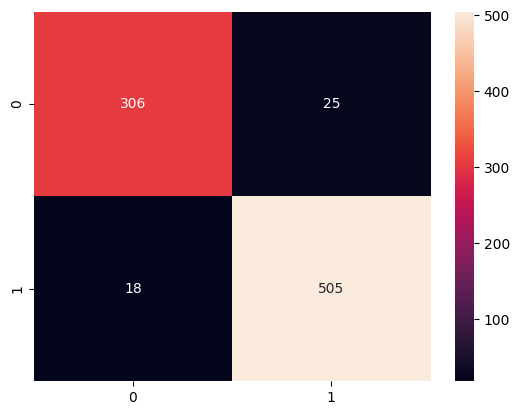

In [98]:
fig, ax = plt.subplots()

sns.heatmap(matrix, annot=True, fmt='d')  # annot is used to show the data on the plot
# fmt is used to format the data that is shown. 'd' is used for decimal

In [88]:
fig.savefig('confusion_matrix')

# Taking Prediction for a single plot
We have to send data in 2-D array

In [89]:
pred = ann_model.predict(x_test_transformed[25].reshape(1,12))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [90]:
pred

array([[0.9999147]], dtype=float32)

In [99]:
import joblib

In [100]:
joblib.dump(std_scaler,'Standard_Scaler.lb')

['Standard_Scaler.lb']